$$
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$

# CS236781: Deep Learning

# Tutorial 1: Python and PyTorch basics

In this tutorial, we will cover:
* Course info 
* Environment setup with `conda`
* Jupyter: Using notebooks
* Pytorch:
  - Tensors basics: indexing, datatypes, math
  - Broadcasting
  - Intro to automatic differentiation

Also in this tutorial, but for self-study:
* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes


## Administration and General Info

My info:
- Aviv A. Rosenberg
- avivr@cs.technion.ac.il
- Office hour: Thursdays, 13:30.


Course:
- Website is at https://vistalab-technion.github.io/cs236781/
- Updates will be posted there (but emails will be sent via WebCourse)
- Post questions on **Piazza** only! (Not email, not facebook)
- Any questions about the **homeworks** or **tutorials**: I'll answer on Piazza.
- For personal administrative requests/delays: email Chaim.
- For appeals/questions about grades: Email Yaniv/Evgenii/Ben.

Video Lectures (by Prof. Alex Bronstein)
- Provide a high level presentation of most core topics of Deep Learning, including very recent topics.
- Give mathematical background and justifications.

In-class Lectures
- Supplementary material with more in-depth examples or advanced topics.

Tutorials:
- Structure is usually a short theory reminders part and then step-by-step technical implementation of a real  problem.
- Technical, meant to help you understand the implementation details behind deep learning.
- **Highly relevant** for success in the homework assignments.
- After this tutorial you should clone the [tutorials repo](https://github.com/vistalab-technion/cs236781-tutorials), install the conda env and play with the code.
- Videos are available on course site (by Aviv Rosenberg) - requires a technion account.

Homework:
- Four HW assignments, quite heavy load. Best to tackle them after you have sufficient programming experience.
- Almost entirely "wet" i.e. implementation of real algorithms with real data.
- Should be done in pairs.
- Some will require use of GPUs. We will provide access to course servers - **please register**.
- Read the [getting started page](https://vistalab-technion.github.io/cs236781/assignments/getting-started) and [collaboration policy](https://vistalab-technion.github.io/cs236781/info/#administration) carefully!

## Environment setup

To install and manage all the necessary packages and dependencies for the
course tutorials and assignments, we use [conda](https://conda.io), a popular package-manager for python.

- The tutorial notebooks and homework assignments come with an `environment.yml` file which defines which third-party libraries we depend on.
- Conda will use this file to create a virtual environment for you.
- This virtual environment includes python and all other packages and tools we specified, separated from any preexisting
python installation you may have.

### Installation

1. Install the python3 version of [miniconda](https://conda.io/miniconda.html).
Follow the [installation instructions](https://conda.io/docs/user-guide/install/index.html)
for your platform.

2. Install all dependencies (into a virtual env) with `conda`:

    ```shell
    conda env update -f environment.yml
    ```
    
    This will also create a new virtual env (`cs236781-tutorials`) if it doesn't already exist.

3. To activate the virtual environment (set up `$PATH`):

    ```shell
    conda activate cs236781-tutorials
    ```

You can also check what conda environments you have and which is active, run

```shell
conda env list
```

#### Short demo of environment setup

We'll now do a quick demo of the environment installation and working with `conda`, since usually there are many questions about this.

### Running Jupyter

From a terminal, enter the folder contaning the tutorial notebooks.
1. Make sure that the active conda environment is `cs236781-tutorials`:

    ```shell
    conda activate cs236781-tutorials
    ```

2. Run jupyter with

    ```shell
    jupyter lab
    ```
    
    This will start a [jupyter lab](https://jupyterlab.readthedocs.io/en/stable/)
    server and open your browser at the local server's url. You can now start working with the notebooks.

If you're new to jupyter notebooks, you can get started by reading the
[UI guide](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
and also about how to use notebooks in
[JupyterLab](https://jupyterlab.readthedocs.io/en/latest/user/notebook.html).

**Important Note**: The course homework and tutorials use **different** conda envs! Make sure to use the correct one each time.

#### Jupyter basics

Jupyter notebooks consist mainly of code and markdown cells.
The code cells contain code that is run by a `kernel`, an
interpreter for some programming language, python in our case.

In [5]:
# This is a code cell; it can contain arbitrary python code.

foo = 'bar'
print(foo)

def the_answer():
    return 42

# The output of the last expression in a cell is shown
2*the_answer()
the_answer()

bar


42

Variables and functions defined in a code cell are available in subsequent cells.

In [8]:
ans = the_answer()

In [9]:
ans

42

This is a markdown cell. You can use markdown syntax to format your text, and also include equations
written in $\LaTeX$:

$$
e^{i\pi} - 1 = 0
$$

Other useful things to know about:
* Opening a console for notebook
* Restarting kernel
* Magics

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%timeit the_answer()

52.7 ns ± 0.148 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Introduction

Python is a great general-purpose programming language on its own and with the addition of a few
popular libraries such as `numpy`, `scipy`, `pandas`, `scikit-learn`, `matplotlib` and others it becomes an
effective scientific computing environment.

Today it is also the most-used language for machine learning both in research and industry.

Recently many **Deep Learning frameworks** have emerged for python.
Arguably the most notable ones in 2021 are **TensorFlow** (with the Keras frontend) and **PyTorch**.

In this course we'll use PyTorch, which is currently [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry) for research.

<center><img src="https://thegradient.pub/content/images/2019/10/number_medium.png" width="700"/></center>

Many of you may have some experience with Python and numpy; for the rest of you, this notebook can serve as a quick crash course both on the Python programming language and on the use of PyTorch for scientific computing with tensors.

However, we recommend getting up to speed with python using the numerous availble online resources.

If you have previous knowledge in Matlab,
we recommend the [numpy for Matlab users](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html) page as a useful resource.

Credit: Parts of the Python tutorial here were adapted from the [CS231n Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson.

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

Python has great [documentation](https://docs.python.org/3)! Use it often.

### Packages and modules

A python **module** is simply a python file (`.py`), which can contain functions, classes and even top-level code.

A **package** is a collection of modules within a directory. Python comes with a standard library which
includes many useful packages.

A package must be imported before use. They can be imported like so:

In [ ]:
# Import packages from the python standard library
import math
import sys

Additionally, we can define our own packages and modules. This tutorial comes with a `demo_package`
which includes a `demo_module`.

Any object can be imported from a module like so:

In [ ]:
# Import just a specific function from a specific module from a specific package
from demo_package.demo_module import demo_func

demo_func(math.pi)
print('FOO', file=sys.stdout)

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [ ]:
x = 3
print(x, type(x))

In [ ]:
print(x + 1)  # Addition;
print(x - 1)  # Subtraction;
print(x * 2)  # Multiplication;
print(x ** 2)  # Exponentiation;

In [ ]:
x += 1
print(x)
x *= 2
print(x)

In [ ]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2, y / 2, y // 2)

Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [ ]:
t, f = True, False

Now we let's look at the operations:

In [ ]:
print(t and f) # Logical AND
print(t or f ) # Logical OR
print(not t  ) # Logical NOT
print(t != f ) # Logical XOR

#### Strings

In [ ]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
hello, len(hello)

In [ ]:
# String concatenation
'aaa ' + 'bbb'

There are several way to created formatted strings, here are a couple:

In [ ]:
s = 'hello'
a = [1,2,3]

# sprintf style string formatting
print('%s %s: pi=%.5f' % (s, a, math.pi))

# formatting with f-string literals (python 3.6+)
print(f'{s} {a}: pi={math.pi:.5f}')

String objects have a bunch of useful methods; for example:

In [ ]:
s = "hello"
print(s.capitalize() ) # Capitalize a string; prints "Hello"
print(s.upper()      ) # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7)     ) # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7)    ) # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

You can find a list of all string methods in the [documentation](https://docs.python.org/3/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [ ]:
xs = [3, 1, 2]   # Create a list
print(xs)
print(xs[2], xs[-1]) # Negative indices count from the end of the list; prints "2"

In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

In [ ]:
x = xs.pop()     # Remove and return the last element of the list
x, xs

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [ ]:
nums = list(range(5))
nums

In [ ]:
nums[2:4]    # Get a slice from index 2 to 4 (exclusive)

In [ ]:
nums[2:]     # Get a slice from index 2 to the end

In [ ]:
nums[:2]     # Get a slice from the start to index 2 (exclusive)

In [ ]:
nums[:]      # Get a slice of the whole list

In [ ]:
nums[:-1]    # Slice indices can be negative

In [ ]:
nums[0:4:2]  # Can also specify slice step size

In [ ]:
nums[2:4] = [8, 9] # Assign a new sublist to a slice
nums

In [ ]:
# Delete elements from a list
nums[0:1] = []
del nums[-1]
nums

#### Loops

You can loop over the elements of a list like this:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(f'#{idx+1}: {animal}')

#### List comprehensions

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
squares

You can make this code simpler using a list comprehension:

In [ ]:
squares = [x ** 2 for x in nums]
squares

List comprehensions can also contain conditions:

In [ ]:
even_squares = [x ** 2 for x in nums if x % 2 == 0]
even_squares

List comprehensions can be nested:

In [ ]:
nums2 = [-1, 1]
[x * y for x in nums for y in nums2]

#### Dictionaries

A dictionary stores (key, value) pairs. In other languages this is known as a `Map` or `Hash`.

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary
print('cat' in d)     # Check if a dictionary has a given key

In [ ]:
d['fish'] = 'wet'    # Set an entry in a dictionary
d

In [ ]:
# Trying to access a non-existing key raises a KeyError
try:
    d['monkey']
except KeyError as e:
    print(e, file=sys.stderr)

In [ ]:
print(d.get('monkey', 'N/A'))  # Get an element with a default
print(d.get('fish', 'N/A'))    # Get an element with a default

In [ ]:
del d['fish']        # Remove an element from a dictionary
d

In [ ]:
# Iteration over keys
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    print(f'A {animal} has {d[animal]} legs')

In [ ]:
# Iterate over key-value pairs
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, num_legs in d.items():
    print(f'A {animal} has {num_legs} legs')

In [ ]:
# Create a dictionary using the built-in dict() function
dict(foo=1, bar=2, baz=3)

#### Dictionary comprehensions

These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
even_num_to_square

#### Sets

A set is an unordered collection of distinct elements

In [ ]:
animals = {'cat', 'dog'}
print(animals)
print('cat' in animals )  # Check if an element is in a set
print('fish' in animals) # prints "False"

In [ ]:
animals.add('fish') # Add an element to a set
print('fish' in animals)
len(animals) # Number of elements in a set

In [ ]:
animals.add('cat')       # Adding an element that is already in the set does nothing
animals

_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print(f'#{idx}: {animal}')

#### Set comprehensions

Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [ ]:
from math import sqrt
s = {int(sqrt(x)) for x in range(37)}
s

#### Tuples

A tuple is an **immutable** ordered list of values.

In [ ]:
t = (1, 2, 'three')
t

It can be used in ways similar to a list:

In [ ]:
t[0:1], t[1:3], t[-1], len(t)

A tuple can be used a key in a dictionary and as an element of a sets, while **lists cannot**.

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
d

A tuple (and also a list) can be **unpacked**:

In [ ]:
one, two, three = t
one, two, three

Note that when retuning multiple values from a function (or code block in a jupyter notebook, as above)
your values get wrapped in a tuple, and the tuple is what's returned.
Unpacking the return value of a function can make it seem as if multiple values were returned.

### Functions

Python functions are defined using the `def` keyword. For example:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

We will often define functions to take optional keyword arguments, like this:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

#### Positional and Keyword arguments

Python functions are very flexible in the way they accept arguments. Both positional (regular) and keyword
arguments are supported and can be mixed in the same definition. Additionally, extra arguments can be passed in with the `*args` and `**kwargs` constructs.

Here's a function with three positional arguments and three keyword arguments which also accepts extra 
positional and keyword arguments.

In [ ]:
def myfunc(a1, a2, a3, *extra_args, kw1='foo', kw2='bar', kw3=3, **extra_kwargs):
    print(f'Got positional args: {(a1, a2, a3)}')
    print(f'Got keyword args   : {dict(kw1=kw1, kw2=kw3, kw3=kw3)}')
    print(f'Got extra positional args: {extra_args}')
    print(f'Got extra keyword args: {extra_kwargs}')

It can be called in many ways:

In [ ]:
myfunc(1,2,3,4,5,6)

In [ ]:
my_args = [1,2,3,4]
myfunc(*my_args)

In [ ]:
myfunc(1,2,3, kw3=3, kw2=2, foo='bar')

In [ ]:
my_kwargs = dict(kw1=1, kw2=2, kw3=3, kw4=4)
myfunc(1,2,3, **my_kwargs)

Note that keyword args can be omitted, while positional args cannot:

In [ ]:
try:
    myfunc(1,2)
except TypeError as e:
    print(e, file=sys.stderr)

### Classes

The syntax for defining classes in Python is straightforward:

In [ ]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method
g.greet(loud=True)   # Call an instance method

Classes can implement special **magic functions** that enable them to be integrated nicely with other python code. Magic functions have special names that start and end with `__`.

For example, here's a class that can be indexed with `[]` and iterated over with a `for` loop.

In [ ]:
class ExampleCollection(object):
    def __init__(self):
        self.items = [100, 200, 300]
    
    def __len__(self):
        return len(self.items)
    
    def __getitem__(self, idx):
        return self.items[idx]
    
    def __iter__(self):
        class ExampleIter():
            def __init__(self, collection):
                self.idx = 0
                self.collection = collection
                
            def __next__(self):
                if self.idx >= len(self.collection):
                    raise StopIteration()
                x = self.collection[self.idx]
                self.idx += 1
                return x
                
        return ExampleIter(self)
    

In [ ]:
example = ExampleCollection()
print('length=', len(example)) # invokes __len__
print('example[0]=', example[0]) # invokes __getitem__

In [ ]:
for x in example: # invokes __iter__ and it's __next__
    print(x)

Many other magic functions exist. Consult the docs and see if you can catch 'em all!

## PyTorch

PyTorch is a relatively new yet widely used deep learning framework for python.

It can also be used as a general scientific computing library, as it provides a high-performance multidimensional array object, with GPU support.

We'll refer to such n-dimentional arrays as **tensors** in accordance with the deep learning terminology.
Crucially, pytorch supports **automatic differentiation** through arbitrary computations performed on its tensors.

During the course we'll use it extensively and learn many parts of its API.
You should also familiarize yourself with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you when implementing your own models.

This notebook will show only **a small part** of PyTorch's API, the `Tensor` class.
This class is very similar to numpy's `ndarray`, and provides much of the same functionality.
However, it also has two important distinctions:
- Support for GPU computations.
- Can store extra data needed for implementing **automatic differentiation** used for back propagation:
    - A tensor of the same dimentions containing the gradient of this tensor w.r.t. some scalar (e.g. loss).
    - A node representing an operation in the computational graph that produced this tensor.

In the next tutorials we will examine these concepts further.

This notebook will show some brief examples, just to get a feel for it and compare it to the usual numpy `ndarray`s.

You will be using both PyTorch tensors and numpy `ndarray`s extensively throughout the course homework assignments, and in general when implementing deep learning algorithms.
Although we'll mainly use **PyTorch** tensors for implementing our Deep Learning systems, it's still important to be proficient with `numpy`, since:
1. They concepts are very similar. Understanting one will help you quickly be proficient with the other.
1. You'll find that you need to switch between the two when working with read DL systems.

To use pytorch, we first need to import the `torch` package:

In [14]:
import torch

### Tensors: n-dimentional arrays

An tensor represents an n-dimentional grid of values, all of the same type, and is indexed by a tuple of nonnegative integers.

- The the **rank** of the tensor is the number of dimensions it has
- The **shape** of a tensor is a tuple of integers giving the number of elements along each dimension

We can initialize tensors from nested Python lists, and access elements using square brackets:

In [20]:
a = torch.tensor([1, 2, 3.])  # Create a rank 1 array
a

tensor([1., 2., 3.])

In [16]:
# Indexing always returns tensors
a[0]

tensor(1.)

In [17]:
# Use .item() to get a python scalar 
a[0].item()

1.0

Two very important properties of any tensor are its `shape` and `dtype`.

In [21]:
def print_arr(arr, pre_text=''):
    print(f'shape={tuple(arr.shape)} dtype={arr.dtype}:')
    print(f'{pre_text}{arr}\n')

In [22]:
print_arr(a)

shape=(3,) dtype=torch.float32:
tensor([1., 2., 3.])



In [23]:
a[0] = 5                 # Change an element of the array
a

tensor([5., 2., 3.])

In [25]:
b = torch.tensor([[1,2,3],[4,5,6.7]])   # Create a rank 2 array
print_arr(b)

shape=(2, 3) dtype=torch.float32:
tensor([[1.0000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.7000]])



In [27]:
b[0, 0], b[0, 1], b[1, 0]

(tensor(1.), tensor(2.), tensor(4.))

Torch also provides many functions to create arrays:

In [28]:
torch.zeros((2, 2))  # Create an array of all zeros

tensor([[0., 0.],
        [0., 0.]])

In [30]:
torch.ones((1, 10))   # Create an array of all ones

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [31]:
torch.full((3, 3), 7.2) # Create a constant array

tensor([[7.2000, 7.2000, 7.2000],
        [7.2000, 7.2000, 7.2000],
        [7.2000, 7.2000, 7.2000]])

In [32]:
torch.eye(4, dtype=torch.int) # Create an identity matrix of integers

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=torch.int32)

In [34]:
t = torch.rand((4,4,3)) # Create a 3d-array filled with U[0,1] random values
t

tensor([[[0.0316, 0.9702, 0.1566],
         [0.8995, 0.6036, 0.5985],
         [0.2884, 0.0583, 0.7011],
         [0.5481, 0.8092, 0.8537]],

        [[0.8373, 0.4176, 0.4366],
         [0.7384, 0.3080, 0.8267],
         [0.7264, 0.1527, 0.4626],
         [0.2111, 0.0363, 0.1587]],

        [[0.9155, 0.2817, 0.2180],
         [0.4676, 0.2991, 0.3171],
         [0.7451, 0.8384, 0.0388],
         [0.3747, 0.3588, 0.9764]],

        [[0.6504, 0.6286, 0.5923],
         [0.2936, 0.3447, 0.7068],
         [0.0286, 0.7618, 0.9506],
         [0.2290, 0.5463, 0.7418]]])

#### Array rank

In `torch` **rank** means **number of dimensions**.

**rank-0** arrays are scalars.

In [35]:
a0 = torch.tensor(17)
print_arr(a0)

shape=() dtype=torch.int64:
17



In [36]:
# Get scalar as a python float
a0.item()

17

**rank-1** arrays of length `n` have a shape of `(n,)`. 

In [37]:
# A rank-1 array
a1 = torch.tensor([1,2,3])

print_arr(a1)

shape=(3,) dtype=torch.int64:
tensor([1, 2, 3])



In [38]:
# A rank-1 array scalar
print_arr(torch.tensor([3.14]))

shape=(1,) dtype=torch.float32:
tensor([3.1400])



**rank-2** arrays have a shape of `(n,m)`. 

In [39]:
a2 = torch.tensor([[1,2,3], [4,5,6]])

print_arr(a2)

shape=(2, 3) dtype=torch.int64:
tensor([[1, 2, 3],
        [4, 5, 6]])



A column vector is also rank-2!

In [41]:
a_col = a1.reshape(-1, 1)

print_arr(a_col)

shape=(3, 1) dtype=torch.int64:
tensor([[1],
        [2],
        [3]])



And a row vector is also rank-2:

In [42]:
a_row = a1.reshape(1, -1)

print_arr(a_row)

shape=(1, 3) dtype=torch.int64:
tensor([[1, 2, 3]])



**rank-k** arrays have a shape of `(n1,...,nk)`. 

In [43]:
print_arr(torch.zeros((2,3,4)))

shape=(2, 3, 4) dtype=torch.float32:
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])



In [44]:
print_arr(torch.ones((2,2,2,2)))

shape=(2, 2, 2, 2) dtype=torch.float32:
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])



### Tensor math

#### Elementwise operations
Basic mathematical functions **operate elementwise** on arrays, and are available both as operator overloads and as functions in the `torch` module:

In [46]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float)

# Elementwise basic math
print_arr(x + y)

shape=(2, 2) dtype=torch.float32:
tensor([[ 6.,  8.],
        [10., 12.]])



In [47]:
print_arr(x - y)

shape=(2, 2) dtype=torch.float32:
tensor([[-4., -4.],
        [-4., -4.]])



In [50]:
print_arr(x * y)

shape=(2, 2) dtype=torch.float32:
tensor([[ 5., 12.],
        [21., 32.]])



In [49]:
print_arr(x / y)

shape=(2, 2) dtype=torch.float32:
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])



In [51]:
# Elementwise functions
print_arr(torch.sqrt(x))

shape=(2, 2) dtype=torch.float32:
tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]])



In [52]:
print_arr(torch.exp(x))

shape=(2, 2) dtype=torch.float32:
tensor([[ 2.7183,  7.3891],
        [20.0855, 54.5981]])



In [53]:
print_arr(torch.log(x))

shape=(2, 2) dtype=torch.float32:
tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]])



There are of course many more elementwise operations inmplemented by `torch`.

#### Inner and outer products

Unlike e.g. MATLAB, `*` is elementwise multiplication, not matrix multiplication (as we saw above).

We can instead use the `torch.matmul()` function to:
- compute inner or outer products of vectors,
- multiply a vector by a matrix, and to
- multiply matrices, and more generally n-d tensors.

Note: We can also use python's `@` operator as a shorthand for `matmul`.

In [55]:
v = torch.tensor([9,10])
w = torch.tensor([11, 12])

# Inner product of vectors; both produce 219
print(torch.matmul(v, w))
print(torch.dot(v, w))  # dot() is for 1d-tensors only
print(v @ w)

tensor(219)
tensor(219)
tensor(219)


Rank-1 arrays arrays are somewhat special in that `torch` can treat them both as column or as row vectors.
Arrays of different rank have different semantics when using them in vector-vector or vector-matrix products, so always make sure you know what shapes you're working with:

In [56]:
print_arr(a1, 'a1\t\t')
print_arr(a_row, 'a_row\t\t')
print_arr(a_col, 'a_col\t\t')

shape=(3,) dtype=torch.int64:
a1		tensor([1, 2, 3])

shape=(1, 3) dtype=torch.int64:
a_row		tensor([[1, 2, 3]])

shape=(3, 1) dtype=torch.int64:
a_col		tensor([[1],
        [2],
        [3]])



In [57]:
# Inner products, but output dimenstions are different
print_arr(torch.matmul(a1, a1), 'a1 @ a1 =\t')
assert torch.matmul(a1, a1) == a1 @ a1

print_arr(torch.matmul(a_row, a1), 'a_row @ a1 =\t')
assert torch.matmul(a_row, a1) == a_row @ a1

print_arr(torch.matmul(a1, a_col), 'a1 @ a_col =\t')
assert torch.matmul(a1, a_col) == a1 @ a_col

print_arr(torch.matmul(a_row, a_col), 'a_row @ a_col =\t')
assert torch.matmul(a_row, a_col) == a_row @ a_col

# Outer product
print_arr(torch.matmul(a_col, a_row), 'a_col @ a_row =\n')
assert torch.all(torch.matmul(a_col, a_row) == a_col @ a_row)

shape=() dtype=torch.int64:
a1 @ a1 =	14

shape=(1,) dtype=torch.int64:
a_row @ a1 =	tensor([14])

shape=(1,) dtype=torch.int64:
a1 @ a_col =	tensor([14])

shape=(1, 1) dtype=torch.int64:
a_row @ a_col =	tensor([[14]])

shape=(3, 3) dtype=torch.int64:
a_col @ a_row =
tensor([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]])



#### Non-elementwise operations

Torch provides many useful functions for performing computations on arrays.

In [58]:
x = torch.tensor([[1,2,3],[3,4,5]], dtype=torch.float)
print_arr(x)

shape=(2, 3) dtype=torch.float32:
tensor([[1., 2., 3.],
        [3., 4., 5.]])



In [59]:
print_arr(torch.sum(x))  # Compute sum of all elements
print_arr(torch.mean(x, dim=0))  # Compute mean of each column
print_arr(torch.prod(x, dim=1)) # Compute product of each row

shape=() dtype=torch.float32:
18.0

shape=(3,) dtype=torch.float32:
tensor([2., 3., 4.])

shape=(2,) dtype=torch.float32:
tensor([ 6., 60.])



In [60]:
# In many cases, it's useful to aggregate but keep the original rank
print_arr(torch.mean(x, dim=0, keepdim=True))
print_arr(torch.prod(x, dim=1, keepdim=True))

shape=(1, 3) dtype=torch.float32:
tensor([[2., 3., 4.]])

shape=(2, 1) dtype=torch.float32:
tensor([[ 6.],
        [60.]])



You can find the full list of mathematical functions provided by torch in the [documentation](https://pytorch.org/docs/stable/index.html).

### Indexing

Pytorch offers several ways to index into arrays.

**Slicing**

Similar to Python lists, tensors can be sliced. Since they may be multidimensional, you must specify **a slice for each dimension** of the array:

In [61]:
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print_arr(a)

shape=(3, 4) dtype=torch.int64:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])



In [62]:
b = a[:2, 1:3]

print_arr(b)

shape=(2, 2) dtype=torch.int64:
tensor([[2, 3],
        [6, 7]])



A slice of an array is a **view** into the same in-memory data, so modifying it will modify the original array.

In [63]:
# Changing a view
b[0, 0] = 77777

# ...modifies original
a

tensor([[    1, 77777,     3,     4],
        [    5,     6,     7,     8],
        [    9,    10,    11,    12]])

You can also mix integer indexing with slice indexing.
However, doing so will yield an array of **lower rank** than the original array.


Two ways of accessing the data in the middle row of the array.
- Mixing integer indexing with slices yields an array of lower rank
- Using only slices yields an array of the same rank as the original array

In [64]:
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [67]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a

print_arr(row_r1)
print_arr(row_r2)
print_arr(row_r3)

shape=(4,) dtype=torch.int64:
tensor([5, 6, 7, 8])

shape=(1, 4) dtype=torch.int64:
tensor([[5, 6, 7, 8]])

shape=(1, 4) dtype=torch.int64:
tensor([[5, 6, 7, 8]])



In [68]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print_arr(col_r1)
print_arr(col_r2)

shape=(3,) dtype=torch.int64:
tensor([ 2,  6, 10])

shape=(3, 1) dtype=torch.int64:
tensor([[ 2],
        [ 6],
        [10]])



**Integer-array indexing** 

- When you slice, the resulting array view will always be a subarray of the original array.
- Integer array indexing allows you to construct arbitrary arrays using the data from another array.


In [69]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print_arr(a)

shape=(3, 2) dtype=torch.int64:
tensor([[1, 2],
        [3, 4],
        [5, 6]])



In [70]:
# An example of integer array indexing.
# The returned array will have shape (3,)
print_arr(a[ [0, 1, 2], [0, 1, 0] ])

shape=(3,) dtype=torch.int64:
tensor([1, 4, 5])



In [71]:
# The above example of integer array indexing is equivalent to this:
print_arr(torch.tensor([a[0, 0], a[1, 1], a[2, 0]]))

shape=(3,) dtype=torch.int64:
tensor([1, 4, 5])



In [72]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(torch.tensor([a[0, 1], a[0, 1]]))

tensor([2, 2])
tensor([2, 2])


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [73]:
# Create a new array from which we will select elements
a = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [75]:
# Create an array of column indices (notice it can repeat)
col_idx = torch.tensor([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
a[torch.arange(4), col_idx]

tensor([ 1,  6,  7, 11])

In [76]:
# Mutate one element from each row of a using the indices in b
a[torch.arange(4), col_idx] += 1000
a

tensor([[1001,    2,    3],
        [   4,    5, 1006],
        [1007,    8,    9],
        [  10, 1011,   12]])

**Boolean array indexing**

This type of indexing is used to select the elements of an array that satisfy some condition
(similar to MATLAB's logical indexing).

In [77]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print_arr(a)

shape=(3, 2) dtype=torch.int64:
tensor([[1, 2],
        [3, 4],
        [5, 6]])



In [79]:
# Find the elements of a that are bigger than 2;
# this returns a numpy array of Booleans of the same
# shape as a, where each slot of bool_idx tells
# whether that element of a is > 2.
bool_idx = (a > 2)
bool_idx

tensor([[False, False],
        [ True,  True],
        [ True,  True]])

In [80]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
a[a>2]

tensor([3, 4, 5, 6])

### Datatypes

Every tensor is a grid of elements of the same type. `Pytorch` provides a large set of numeric datatypes that you can use to construct arrays.
Pytorch tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

Here is an example:

In [81]:
x = torch.tensor([1, 2])  # Let torch choose the datatype
y = torch.tensor([1.0, 2.0])  # Let torch choose the datatype
z = torch.tensor([1, 2], dtype=torch.int64)  # Force a particular datatype

x.dtype, y.dtype, z.dtype

(torch.int64, torch.float32, torch.int64)

### Changing and adding dimensions

You can **transpose** dimensions within an array using arbitrary axis permutations.

In [82]:
a = torch.ones((3, 5))
print_arr(a.transpose(0, 1))
print_arr(a.T)

shape=(5, 3) dtype=torch.float32:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

shape=(5, 3) dtype=torch.float32:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])



Use `permute()` to transpose multiple dimensions simultaneously

In [83]:
a = torch.ones((2, 4, 6))
a[1,2,3] = 777

print_arr(a.permute(1,0,2))

shape=(4, 2, 6) dtype=torch.float32:
tensor([[[  1.,   1.,   1.,   1.,   1.,   1.],
         [  1.,   1.,   1.,   1.,   1.,   1.]],

        [[  1.,   1.,   1.,   1.,   1.,   1.],
         [  1.,   1.,   1.,   1.,   1.,   1.]],

        [[  1.,   1.,   1.,   1.,   1.,   1.],
         [  1.,   1.,   1., 777.,   1.,   1.]],

        [[  1.,   1.,   1.,   1.,   1.,   1.],
         [  1.,   1.,   1.,   1.,   1.,   1.]]])



Note that an element `[x,y,z]` moves to position `[y,x,z]` after a transpose with this permutation (1,0,2).

Another important feature is **reshaping** an array into different dimensions.

In [84]:
a = torch.randint(0, 100, (3, 6))
print_arr(a)

print_arr(torch.reshape(a, (2, 9)))

shape=(3, 6) dtype=torch.int64:
tensor([[11, 88, 96,  6,  3, 48],
        [ 2, 19,  0,  7, 58, 70],
        [45, 51, 41, 37, 72, 29]])

shape=(2, 9) dtype=torch.int64:
tensor([[11, 88, 96,  6,  3, 48,  2, 19,  0],
        [ 7, 58, 70, 45, 51, 41, 37, 72, 29]])



When reshaping, we need to make sure to preserve the same number of elements.
Use `-1` in one of the dimensions to tell numpy to "figure it out".

You can also combine multiple arrays with **concatenation** along an arbitrary axis.

In [85]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6]])
print_arr(a)
print_arr(b)

shape=(2, 2) dtype=torch.int64:
tensor([[1, 2],
        [3, 4]])

shape=(1, 2) dtype=torch.int64:
tensor([[5, 6]])



In [86]:
print_arr(torch.cat((a, b), dim=0))

shape=(3, 2) dtype=torch.int64:
tensor([[1, 2],
        [3, 4],
        [5, 6]])



In [87]:
print_arr(torch.cat((a, b.T), dim=1))

shape=(2, 3) dtype=torch.int64:
tensor([[1, 2, 5],
        [3, 4, 6]])



### Broadcasting

Broadcasting is a powerful mechanism that allows pytorch to work with arrays of **different shapes** when performing arithmetic operations. This mechanism also exists in numpy with the same semantics.

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix.

In [88]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])

print_arr(x,'x=\n')
print_arr(v, '\nv=')

shape=(4, 3) dtype=torch.int64:
x=
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

shape=(3,) dtype=torch.int64:

v=tensor([1, 0, 1])



**Naïve approach**: Use a loop.

In [89]:
y = torch.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

y

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])

This works; however computing explicit loops in Python is **slow**. 

**Naïve approach 2**: adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`.

We could implement this approach like this:

In [90]:
vv = torch.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
vv

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])

In [91]:
y = x + vv  # Add x and vv elementwise
y

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])

Nice, but:
- A new array was allocated and memory was copied.
- We had to explicitly define how many times to replicate v.

**Broadcasting** allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [92]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])

# Add v to each row of x using broadcasting
y = x + v  

print(f'shapes: x={tuple(x.shape)}, v={tuple(v.shape)}\n')
print_arr(y)

shapes: x=(4, 3), v=(3,)

shape=(4, 3) dtype=torch.int64:
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])



The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works **as if** v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1. All input tensors with rank smaller than the input tensor of largest rank, have **1’s prepended to their shapes**.
1. The size in each dimension of the **output shape** is the maximum of all the input sizes in that dimension.
1. An input can be used in the calculation if its size in a particular **dimension either matches** the output size in that dimension, **or has value exactly 1**.
1. If an input has a dimension size of 1 in its shape, the **first data entry in that dimension will be used for all calculations** along that dimension.

In our example:
- `x` has shape `(4,3)`
- `v` has shape `(3,)`.

Following the Broadcasting logic, we can say the following is equivalent to what happened:
1. `v` has less dims than `x` so a dimension of `1` is **prepended** -> `v` is now `(1, 3)`.
1. Output shape will be `(max(1,4), max(3,3)) = (4,3)`.
1. Dim 1 of `v` matches exactly (3): so it's clear which data to use.
1. Dim 0 is exactly 1 for `v` and 4 for `x`: we can use the first data entry (row 0) of `v` for each time any of its rows is accessed. This is effectively like converting `v` from `(1,3)` to `(4,3)` by replicating.

Broadcasting is incredibly useful and necessary for writing **vectorized** code,
i.e. code that avoids explicit python loops which are very slow.
Instead, this approach leveraged the underlying C implementation.

Example: Calculating an outer-product with elementsize product and broadcasting:

In [93]:
# Compute outer product of the vectors
v = torch.tensor([1,2,3])  # v has shape (3,)
w = torch.tensor([4,5])    # w has shape (2,)
print_arr(v)
print_arr(w)

shape=(3,) dtype=torch.int64:
tensor([1, 2, 3])

shape=(2,) dtype=torch.int64:
tensor([4, 5])



To compute an outer product, we first reshape `v` to be a column
vector of shape `(3, 1)`; we can then broadcast it against `w` to yield
an output of shape `(3, 2)`, which is the outer product of `v` and `w`:

In [94]:
# (3,1) * (2,) -> (3,1) * (1, 2) -> (3, 2) * (3, 2)
torch.reshape(v, (3, 1)) * w # note that * is elementwise!

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])

In [95]:
# Multiply a matrix by a constant:
x = torch.ones((2,3))

# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3).

# (2,3) * () -> (2,3) * (1,1) -> (2,3) * (2,3)
x * 2

tensor([[2., 2., 2.],
        [2., 2., 2.]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

### Automatic differentiation

The most important aspect which sets `pytorch` apart from `numpy` is the **automatic differentiation**.

Pytorch can automatically *track* computations performed on tensors to build a *computation graph* which can be used for applying the chain rule in order to compute arbitrary derivatives.

In the remainder of the course we'll go deeper, and use this ability extensively to train neural networks via the back-propagation algorithm.

For now, we'll only show a short demo of this functionality.

In [96]:
# Tell pytorch to track operations w.r.t. this tensor
w = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
w

tensor([1., 2., 3.], requires_grad=True)

In [97]:
# Do some arbitrary calculations with w
x = 2*w
y = torch.exp(-x)
z = y ** 3 - 2
z

tensor([-1.9975, -2.0000, -2.0000], grad_fn=<SubBackward0>)

In [98]:
# Aggregate so that we get a scalar
l = torch.sum(z)
l

tensor(-5.9975, grad_fn=<SumBackward0>)

Notice the `grad_fn` property which appeared. Let's see what we can now do.

In [99]:
from torch import autograd

# This is where the magic happens
w_grad = autograd.grad(l, w)
w_grad

(tensor([-1.4873e-02, -3.6865e-05, -9.1380e-08]),)

What does each element of `w_grad` contain?

Each element $i$ of `w_grad` is actually the derivative of `l` with respect to that element in `w`!

In other words,

$$
\left[\mathtt{w_{grad}}\right]_i=\frac{\partial \ell}{\partial w_i}.
$$

How did this happen?

When we used `w` for calculations a computation graph was constructed behind the scenes.
This graph contains the intermediate results required to compute the derivative via the chain rule:

$$
\frac{\partial \ell}{\partial \bb{w}} = \frac{\partial \ell}{\partial \bb{z}}\frac{\partial \bb{z}}{\partial \bb{y}}\frac{\partial \bb{y}}{\partial \bb{x}}\frac{\partial \bb{x}}{\partial \bb{w}}
$$


We'll explore this in greater detail over the next tutorials.

For now, lets look at the computation graph resulting from the above calculations.

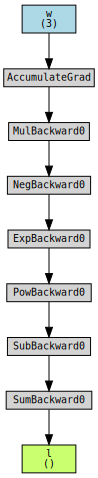

In [100]:
import torchviz

torchviz.make_dot(l, params=dict(w=w, l=l))

**Credits**

This tutorial was written by [Aviv A. Rosenberg](https://avivr.net).<br>
To re-use, please provide attribution and link to the original.

Some images in this tutorial were taken and/or adapted from the following sources:
- https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry

The Python section here was adapted from:
- [CS231n Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson.